In [ ]:
# Import packages
import pandas as pd
import numpy as np
import datetime
from collections import defaultdict
import nltk
import random

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(len(dataset.data))
docs = dataset.data

18846


In [ ]:
docs[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [ ]:
!pip install plsa

     |████████████████████████████████| 1.4MB 12.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=dce45a6e0ecb56c3cdec42f5c3672ea704b6ba30069f71bfd19ddcf7b0b9dd6e
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.6/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.6/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/lib/python3.6/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/lib/python3.6/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
n_topics = 20

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(dataset.data, index=range(len(dataset.data)))

In [ ]:
df

,0
0,\n\nI am sure some bashers of Pens fans are pr...
1,My brother is in the market for a high-perform...
2,\n\n\n\n\tFinally you said what you dream abou...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,1) I have an old Jasmine drive which I cann...
...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,\nNot in isolated ground recepticles (usually ...
18843,I just installed a DX2-66 CPU in a clone mothe...
18844,\nWouldn't this require a hyper-sphere. In 3-...


In [ ]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [ ]:
df.to_csv('out.csv')

In [ ]:
corpus = Corpus.from_csv('out.csv', pipeline)

In [ ]:
plsa = PLSA(corpus, n_topics, True)

In [ ]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     20
Number of documents:  966
Number of words:      8944
Number of iterations: 120

In [ ]:
result = plsa.best_of(5)

In [ ]:
result.topic


array([0.06590334, 0.06088228, 0.05928244, 0.05672958, 0.05607795,
       0.05509827, 0.05498168, 0.05309998, 0.05284773, 0.05112348,
       0.04865313, 0.04676423, 0.0464181 , 0.04641134, 0.04527839,
       0.04387433, 0.04304807, 0.04209243, 0.04041996, 0.0310133 ])

In [ ]:
new_doc = dataset.data[0]

topic_components, number_of_new_words, new_words = result.predict(new_doc)

print('Relative topic importance in new document:', topic_components)
print('Number of previously unseen words in new document:', number_of_new_words)
print('Previously unseen words in new document:', new_words)

print("topic", np.argmax(topic_components))

Relative topic importance in new document: [0.02238634 0.02779214 0.04432854 0.00349248 0.09595652 0.02169635
 0.03737258 0.04176071 0.0184557  0.05439674 0.04116734 0.02133569
 0.04075449 0.0095121  0.03304184 0.04289887 0.01949951 0.38586406
 0.01166649 0.02662152]
Number of previously unseen words in new document: 0
Previously unseen words in new document: ()
topic 17


In [ ]:
for ind, i in enumerate(result.word_given_topic):
  print(ind, i[:10])

0 [('president', 0.02530666874469251), ('tax', 0.00827725670559945), ('option', 0.0074771517256675005), ('people', 0.0069257713539920525), ('int', 0.0066797207613607705), ('function', 0.006091347331089246), ('wchar', 0.005830397538495435), ('bill', 0.005645067051921281), ('thing', 0.005587088905027709), ('state', 0.005460210762672163)]
1 [('com', 0.02450816718933488), ('tor', 0.021802465791524516), ('det', 0.021802465791524516), ('edu', 0.020391195826902433), ('bos', 0.01786300652391033), ('mtl', 0.01721247299330883), ('chi', 0.014960736167194134), ('pit', 0.01376997839464706), ('hfd', 0.010901232895762258), ('wpg', 0.010327483795985299)]
2 [('chip', 0.019142568862341967), ('key', 0.018830055843288195), ('encryption', 0.011662291616989905), ('law', 0.011422441373828075), ('block', 0.010560270970875137), ('enforcement', 0.010274081595068273), ('security', 0.010065405897097611), ('administration', 0.008631796499896547), ('algorithm', 0.008025805937865104), ('escrow', 0.007671359221494142

In [ ]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    20
Number of documents: 966
Number of words:     8944

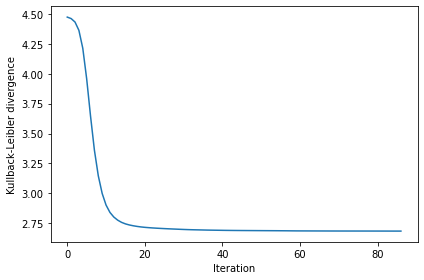

In [ ]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

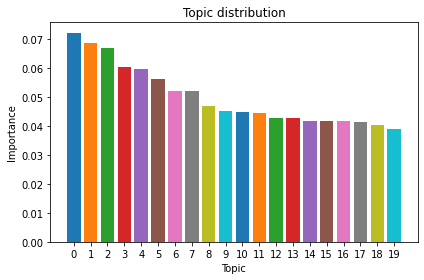

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

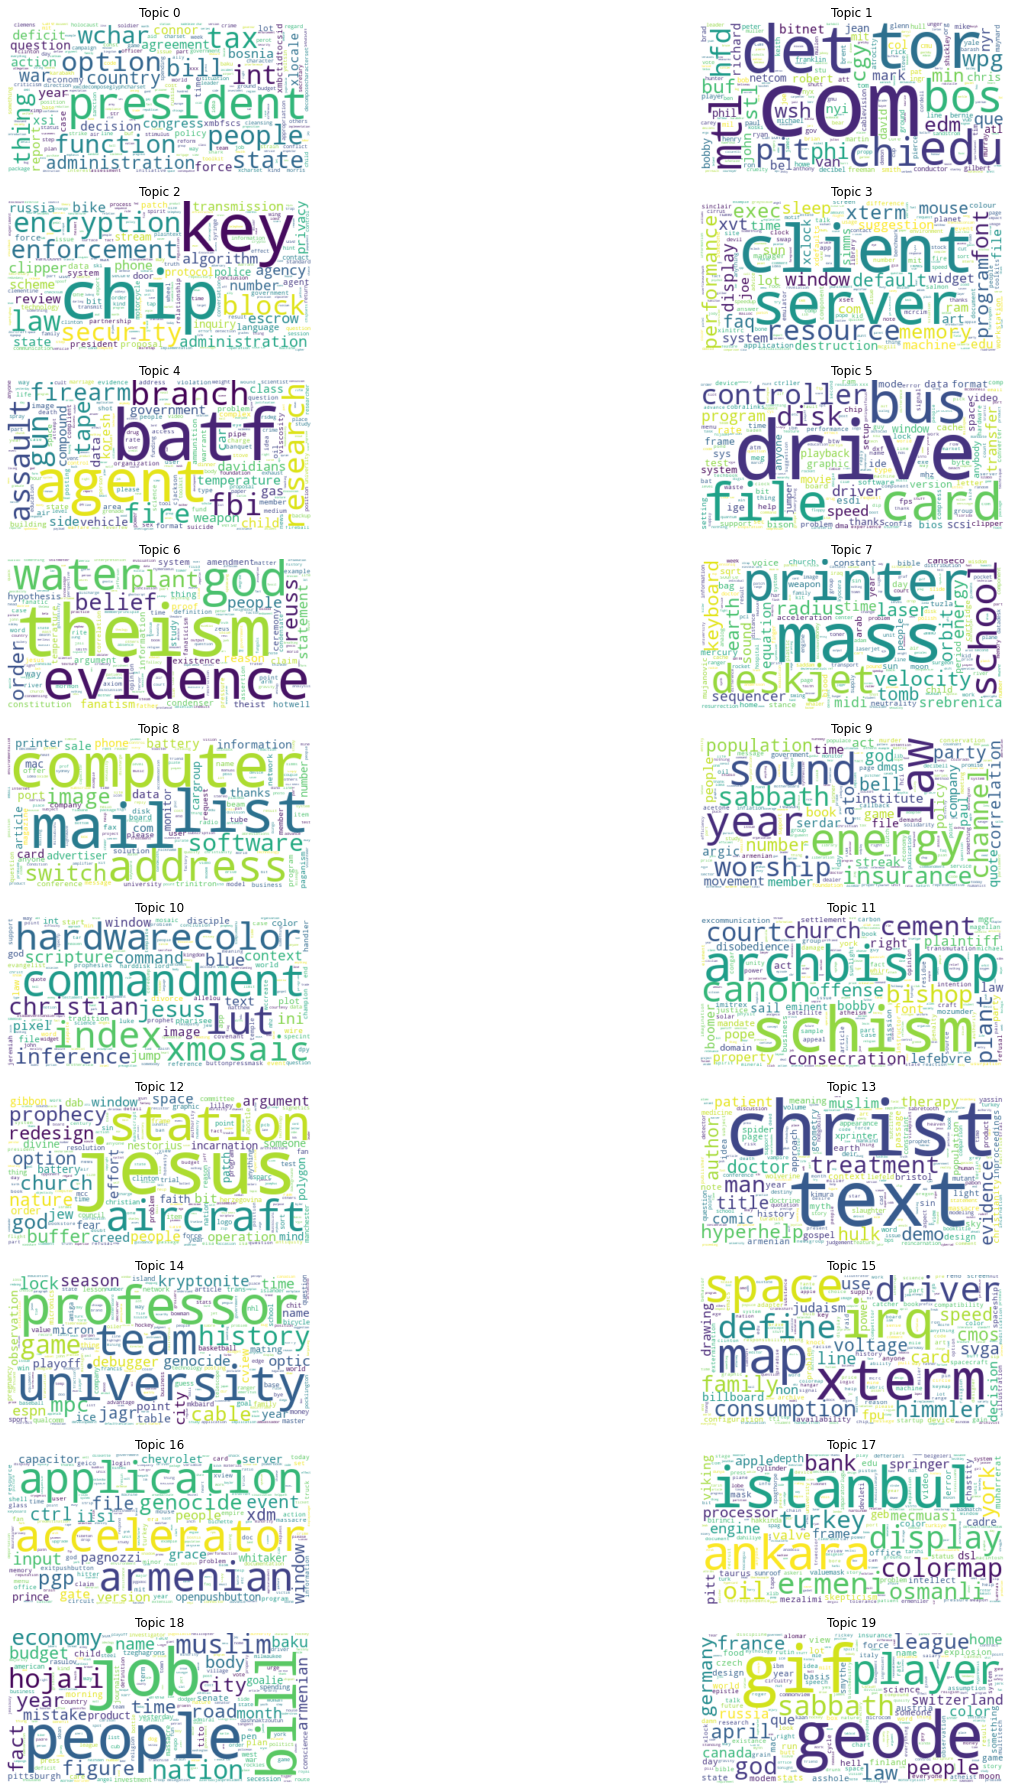

In [ ]:
fig = plt.figure(figsize=(25, 25))
_ = visualize.wordclouds(fig)

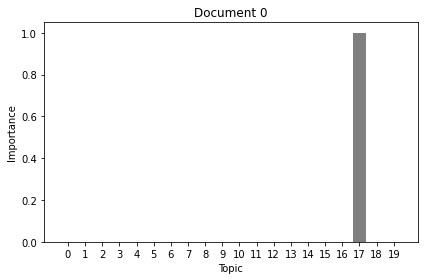

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax)
fig.tight_layout()

In [ ]:
dataset.data[92]

'-= PASTORTALK =-\n\n  A weekly dialogue with a local pastor on the news of the day\n\n                      by Carl (Gene) Wilkes \n\n                       Startext: MC344578 \n                     CompuServe: 70423,600\n                       Internet: 70423.600@compuserve.com\n\n                   -= THIS WEEK\'S THOUGHTS =-\n\nLast week the Supreme Court refused without comment to hear an\nappeal by Rensselaer, IN, school officials desiring the\ndistribution of Bibles in their public schools (REL65, 5/21). A\nlower court had banned the local Gideons, an international Bible-\ndistribution group, from passing out Bibles to fifth-graders. The\nACLU\'s Barry Lynn was quoted as saying that the court\'s action\nprotected the "religious neutrality of our public schools." He also\nsaid that schools must serve students of "all faiths and none."\nSchools were not to be a "bazaar where rival religious groups\ncompete for converts," according to Lynn.\n\nSeveral Gideons, men who are responsib

In [ ]:
dataset.data[174]

'please subscrive me.'

In [ ]:
topic_components, number_of_new_words, new_words = result.predict(dataset.data)

In [ ]:
topic_components

array([0.08571823, 0.06933219, 0.06937128, 0.04161485, 0.0607961 ,
       0.06223803, 0.05585071, 0.04801292, 0.04620532, 0.04722781,
       0.044701  , 0.04529624, 0.04806707, 0.04187452, 0.03918644,
       0.02984969, 0.04008905, 0.03869113, 0.04415142, 0.04172598])

In [ ]:
predLabels = []
for ind, i in enumerate(dataset.data):
  print(ind)
  try:
    topic_components, number_of_new_words, new_words = result.predict(i)
    predLabels.append(np.argmax(topic_components))
  except:
    predLabels.append(0)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/plsi.pkl', 'wb') as f:
  pickle.dump(predLabels, f)

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          clusters,
                          title = ''):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(clusters))
    ytick_marks = np.arange(len(classes))
    plt.xticks(xtick_marks, clusters, rotation=45)
    plt.yticks(ytick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
clusterNames = ["Cluster%d" % i for i in range(20)]

In [ ]:
from sklearn import metrics

In [ ]:
print("Homogeneity", metrics.homogeneity_score(dataset.target, predLabels))
print("Completenesee", metrics.completeness_score(dataset.target, predLabels))
print("Normalized Mutual Information", metrics.normalized_mutual_info_score(dataset.target, predLabels))
print("Purity", purity_score(dataset.target, predLabels))

Homogeneity 0.12171787422923358
Completenesee 0.12591642471867412
Normalized Mutual Information 0.12378155701707838
Purity 0.21484665180940252


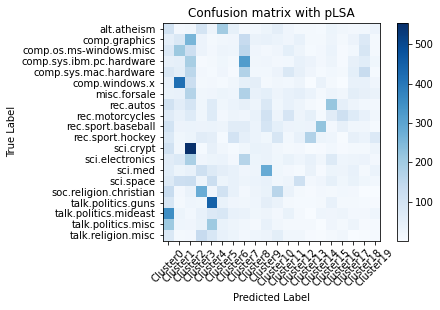

In [ ]:
cm = metrics.confusion_matrix(dataset.target, predLabels)
plt.figure()
plot_confusion_matrix(cm,
                       classes=dataset.target_names,
                       clusters=clusterNames,
                       title='Confusion matrix with pLSA')

In [ ]:
predPair = []
for i in range(len(dataset.data)):
  predPair.append([predLabels[i], dataset.target[i]])

predTuple = {}
for ind in range(20):
  indClasses = []
  for i in predPair:
    if i[0] == ind:
      indClasses.append(i[1])
  predTuple[ind] = indClasses

predMax = {}
for ind in range(20):
  predMax[ind] = max(predTuple[ind], key=predTuple[ind].count)

In [ ]:
predMax

{0: 18,
 1: 10,
 2: 11,
 3: 5,
 4: 16,
 5: 3,
 6: 0,
 7: 14,
 8: 6,
 9: 17,
 10: 15,
 11: 14,
 12: 15,
 13: 15,
 14: 10,
 15: 12,
 16: 5,
 17: 13,
 18: 9,
 19: 9}